# Predicting Log Error of the Zestimate®


## Author:
Christopher Mayorga, Jr. Data Scientist
christopher.mayorga2@gmail.com

## Date:
June 21, 2021

## Project Goals:
Create insight for the current Zillow Zestimate model by predicting the model's log error.

## Conclusions:
Did not find linear correlations of features with respect to Log Error.
Final Model performs well, but not better than the baseline.
Tried Linear Regression and Polynomial Linear Regression models, are there other models that can be used? Other features?

# Table of Contents:
*Acquire* - Use acquire module to assign the data to a variable

*Prepare* - Use prepare module to clean the data

*Explore* - Highlight key takeaways from explore

*Modeling* - Creating 4 models to predict log error and determining the best performing one

*Conclusions - Reasons for log error, best model to predict log error*



# Acquire
- If you would like to see the data before prep, run acquire function
- However, this function is also within the Prepare.py module
calling the Prepare.prepare_zillow() function will use Acquire to obtain the data and prep in one function
- The query in Acquire joins the predictions_2017 and properties_2017 tables, and selects only single-unit properties

In [1]:
# Acquire.py holds functions to connect to sql database, and return a df with data selected with query
import Acquire

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_df = Acquire.get_home_data()

## The original data has 61 columns and 70,364 rows. There is also more that 50% of nulls in many columns.

In [3]:
raw_df.shape

(70364, 61)

In [4]:
raw_df.isnull().sum()

id                              0
parcelid                        0
airconditioningtypeid       50658
architecturalstyletypeid    70213
basementsqft                70320
                            ...  
taxdelinquencyflag          69043
taxdelinquencyyear          69043
censustractandblock          1590
logerror                        0
transactiondate                 0
Length: 61, dtype: int64

Max tax amount: 1824154.85


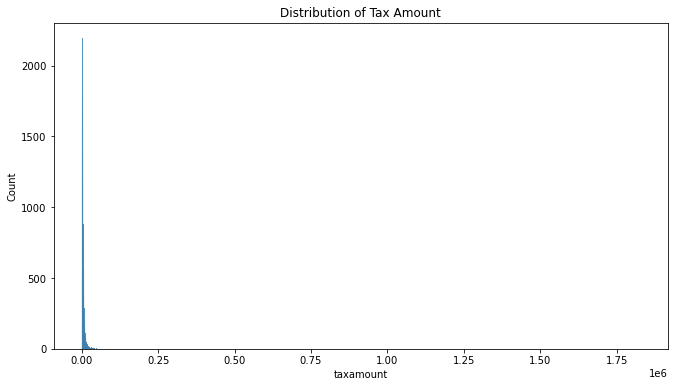

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# An Example of One Feature Before Removing Outliers

# Plotting histogram of Tax Amount
plt.figure(figsize=(11,6))
sns.histplot(raw_df.taxamount)
plt.title('Distribution of Tax Amount')

# Checking the maximum value of the feature
print('Max tax amount:', raw_df.taxamount.max())


# Acquire Takeaways
- large amount of nulls
- outliers present
- new features can be created
- columns need to be renamed, rearranged

# Prepare 
Within the prepare function:

- columns and rows with more than %25 of nulls are removed
- uneccessary columns are removed (such as multiple sqft)
- outliers in continuous variables are removed
- leftover nulls are filled with mean or mode
- features for property age and transaction month are created
- columns are renamed and rearranged


## Prepare.py also splits the data into train, validate, test

70% Train, 20% Validate, 10% Test

In [6]:
# Prepare.py holds the function to obtain the data, prep the data, and split into train, validate, test
import Prepare

In [7]:
# prepare_zillow function acquires the raw data, cleans, and splits the df, returning train, validate, split
train, validate, test = Prepare.prepare_zillow()

train shape:  (44284, 24) , validate shape:  (12491, 24) , test shape:  (6309, 24)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


## The Split Data Frame After Prepare

In [8]:
train.head(1).T

,35177
parcel_id,12881510
log_error,-0.080165
tax_value,114424
structure_tax_value,52011
land_tax_value,62413
tax_amount,1624.52
tax_rate,1.41974
county_id,6037
zip_code,96507
latitude,3.40614e+07


**No nulls are left after using the prepare function**

In [9]:
train.isnull().sum()

parcel_id              0
log_error              0
tax_value              0
structure_tax_value    0
land_tax_value         0
tax_amount             0
tax_rate               0
county_id              0
zip_code               0
latitude               0
longitude              0
census_id              0
bathrooms              0
bedrooms               0
full_bathrooms         0
bed_plus_bath          0
room_count             0
property_sqft          0
lot_sqft               0
land_use_type          0
year_built             0
property_age           0
transaction_date       0
transaction_month      0
dtype: int64

Max tax amount of train: 342940.38


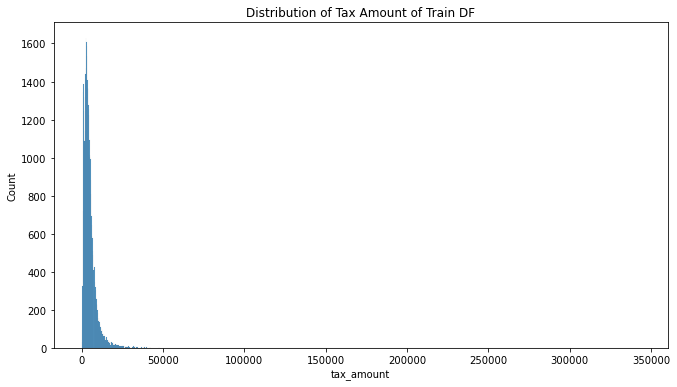

In [10]:
# Same Feature from Acquire Plotted - After Prep and Split into Train

# Plotting train Tax Amount
plt.figure(figsize=(11,6))
sns.histplot(train.tax_amount)
plt.title('Distribution of Tax Amount of Train DF')

# Checking the maximum value of the feature
print('Max tax amount of train:', train.tax_amount.max())

# Prepare Takeaways
- Data has been cleaned as specified in Acquire
- Data is split, but not scaled so we can explore
- X and y dataframes have not been seperated yet
- Will need to be scaled before creating clusters and modeling


# Explore

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Visualizing Independent Feature vs. Log Error in Tableau

In [13]:
raw_df.logerror.mean()

0.016816923510281516

In [14]:
raw_df.logerror.min()

-4.65542037764

In [15]:
raw_df.logerror.max()

5.2629986498